# Task 2: Predicting customer buying behaviour

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('customer_booking.csv', encoding='ISO-8859-1')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


## Data Cleaning

In [3]:
df.shape

(50000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [6]:
df.sales_channel.value_counts()

sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64

In [7]:
df.route.value_counts()

route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: count, Length: 799, dtype: int64

In [8]:
df.flight_day.value_counts()

flight_day
Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: count, dtype: int64

In [9]:
df.booking_origin.value_counts()

booking_origin
Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64

In [44]:
df.duplicated().sum()

719

In [45]:
df = df.drop_duplicates()

In [46]:
df.duplicated().sum()

0

Data is now clean, really to start modelling soon, just need to create dummy variables for category names.

## Feature Engineering

In [19]:
model = pd.get_dummies(df, dtype=int)
model

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,2,262,19,7,1,0,0,5.52,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,112,20,3,0,0,0,5.52,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,243,22,17,1,1,0,5.52,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,96,31,4,0,0,1,5.52,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2,68,22,15,1,0,1,5.52,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,1,0,1,5.62,0,1,...,0,0,0,0,0,0,0,0,0,0
49996,1,111,6,4,0,0,0,5.62,0,1,...,0,0,0,0,0,0,0,0,0,0
49997,1,24,6,22,0,0,1,5.62,0,1,...,0,0,0,0,0,0,0,0,0,0
49998,1,15,6,11,1,0,1,5.62,0,1,...,0,0,0,0,0,0,0,0,0,0


Too many variables, I will clean data a bit more to only include relevant data.

In [13]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


From data cleaning section route and booking_origin have heaps of entries but a lot of entries have 1.

In [47]:
df_route = df.groupby('route').size().reset_index(name='count')
df_route.describe()

,count
count,799.000000
mean,61.678348
std,144.025306
min,1.000000
25%,5.000000
50%,18.000000
75%,56.000000
max,2620.000000


C:\Users\natha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Count'>

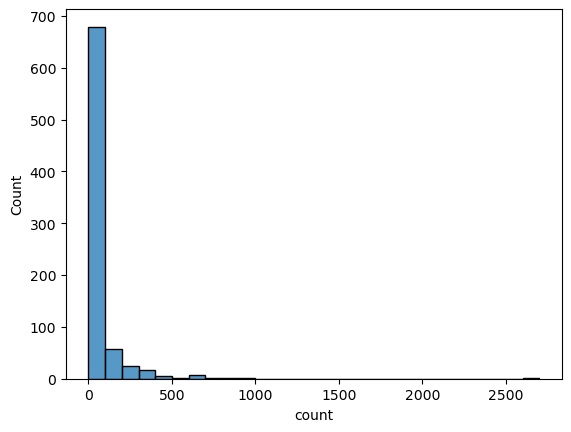

In [48]:
sns.histplot(df_route['count'], binwidth=100)

In [56]:
route_counts = df.route.value_counts()

In [58]:
freq = route_counts[route_counts>100].index

In [61]:
df = df[df['route'].isin(freq)].reset_index()

In [62]:
df_route = df.groupby('booking_origin').size().reset_index(name='count')
df_route.describe()

,count
count,97.000000
mean,350.783505
std,1497.637739
min,1.000000
25%,1.000000
50%,5.000000
75%,36.000000
max,13104.000000


C:\Users\natha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Count'>

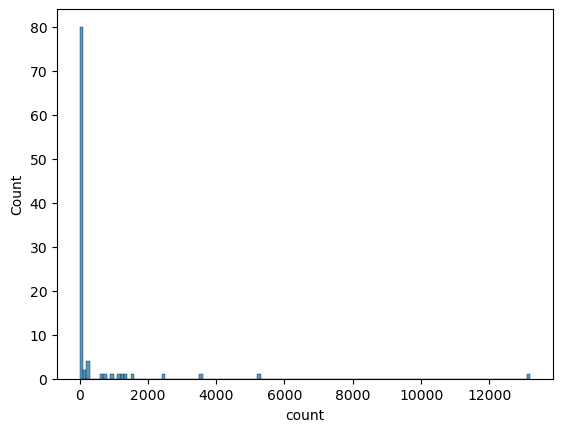

In [63]:
sns.histplot(df_route['count'], binwidth=100)

In [64]:
booking_counts = df.booking_origin.value_counts()

In [66]:
book_freq = booking_counts[booking_counts>100].index

In [73]:
df = df[df['booking_origin'].isin(book_freq)].reset_index()

In [74]:
model1=pd.get_dummies(df, dtype=int)
model1.shape

(33284, 160)

We have 158 variables instead of 929, much better to work with. (2 index columns we ignore).

In [75]:
model1.head()

,level_0,index,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,...,booking_origin_Malaysia,booking_origin_New Zealand,booking_origin_Philippines,booking_origin_Singapore,booking_origin_South Korea,booking_origin_Taiwan,booking_origin_Thailand,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vietnam
0,0,82,1,15,31,17,0,0,0,8.83,...,1,0,0,0,0,0,0,0,0,0
1,1,83,1,31,274,10,1,0,0,8.83,...,1,0,0,0,0,0,0,0,0,0
2,2,84,1,316,35,16,1,0,0,8.83,...,1,0,0,0,0,0,0,0,0,0
3,3,85,2,232,17,3,1,1,1,8.83,...,1,0,0,0,0,0,0,0,0,0
4,4,86,1,156,19,14,1,0,0,8.83,...,1,0,0,0,0,0,0,0,0,0


## Random Forest Regression

We have 924 variables to start with, I will use random forest regression to see which variables are relevant in predicitng if a booking is complete.

In [78]:
y = model1['booking_complete']
y.value_counts()

booking_complete
0    28271
1     5013
Name: count, dtype: int64

In [77]:
X= model1.drop(['booking_complete', 'level_0','index'] , axis = 1)
X.shape

(33284, 157)

In [83]:
#import sklearn libraries for RandomForest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [80]:
#Split the data into training and testing units 80/20
#random state = 42 fixes each set so it doesn't change
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [81]:
#Define number of models to train 
k = 10

In [84]:
#Initialise lists to store performance metrics
mse_list = []
r2_list = []

#loop to train k Random Forest models
for i in range(k):
     #Initialise the Random Forest Regressor with a different random state
    rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = i)

    #Train the model
    rf_regressor.fit(X_train, y_train)
    
    #Make predictions on the test set
    y_pred = rf_regressor.predict(X_test)

    #Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    #Append the metrics to the lists
    mse_list.append(mse)
    r2_list.append(r2)

    print(f'Model {i+1}:')
    print(f' Mean Squared Error: {mse}')
    print(f' R-squared: {r2}')

#Calculate the average performance across all k models
average_mse = np.mean(mse_list)
average_r2 = np.mean(r2_list)

print(f'Average MSE: {average_mse}')
print(f'Average R-squared: {average_r2}')

    

Model 1:
 Mean Squared Error: 0.1145721157219635
 R-squared: 0.13287974668145464
Model 2:
 Mean Squared Error: 0.11417161205414517
 R-squared: 0.13591089295736358
Model 3:
 Mean Squared Error: 0.11456416594895932
 R-squared: 0.13293991323365428
Model 4:
 Mean Squared Error: 0.11404271433161418
 R-squared: 0.13688643421457913
Model 5:
 Mean Squared Error: 0.11392541790366441
 R-squared: 0.1377741729778572
Model 6:
 Mean Squared Error: 0.11386719635972159
 R-squared: 0.13821481317738715
Model 7:
 Mean Squared Error: 0.1146913160290755
 R-squared: 0.13197759872121761
Model 8:
 Mean Squared Error: 0.11367431950077612
 R-squared: 0.13967457002777073
Model 9:
 Mean Squared Error: 0.1140440309532155
 R-squared: 0.13687646958008448
Model 10:
 Mean Squared Error: 0.114628954171048
 R-squared: 0.1324495742083549
Average MSE: 0.11421818429741833
Average R-squared: 0.1355584185779724


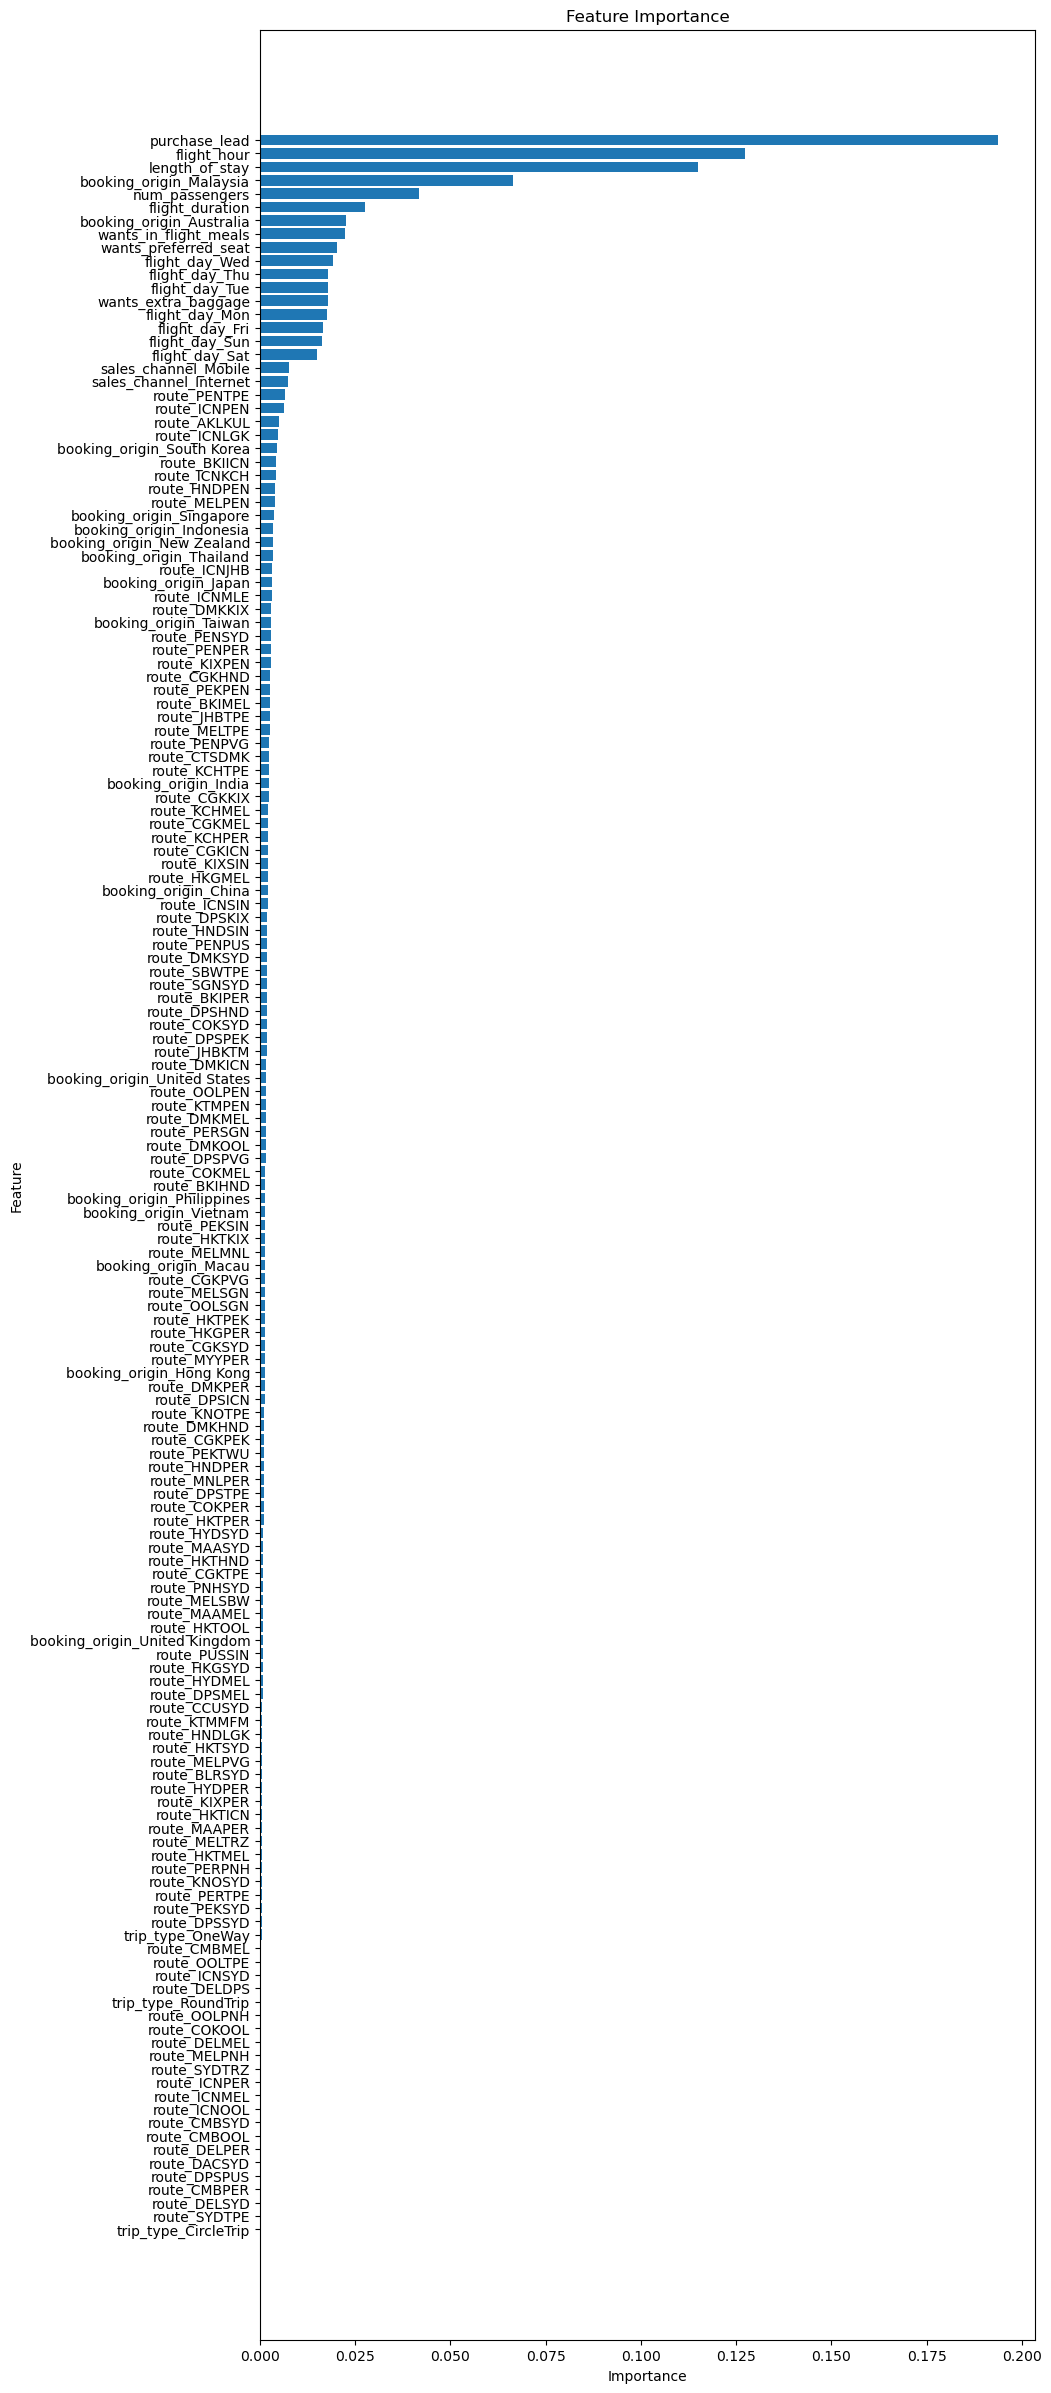

In [94]:
#Get feature importance
feature_importances = rf_regressor.feature_importances_

#Get feature names
feature_names = list(X.columns)

#Sort feature importance and feature name in descending order
sorted_indices = np.argsort(feature_importances)
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

#Plot the feature importances
plt.figure(figsize=(10,30))
plt.barh(range(len(sorted_feature_importances)), sorted_feature_importances, tick_label=sorted_feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

### Conclusion 1
Route and Trip Type were very unimportant as a whole. Sales Channel also had very low impact. Besides booking origin in Australia and Malaysia others were unimportant. Purchase_lead, flight_hour and length of stay were most important.  
Will repeat with dropping Route, Trip Type and Sales Channel.

## Random Forest Regression 2

In [95]:
df.head()

,level_0,index,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,0,82,1,Internet,RoundTrip,15,31,17,Mon,AKLKUL,Malaysia,0,0,0,8.83,1
1,1,83,1,Internet,RoundTrip,31,274,10,Tue,AKLKUL,Malaysia,1,0,0,8.83,0
2,2,84,1,Internet,RoundTrip,316,35,16,Tue,AKLKUL,Malaysia,1,0,0,8.83,0
3,3,85,2,Internet,RoundTrip,232,17,3,Tue,AKLKUL,Malaysia,1,1,1,8.83,0
4,4,86,1,Internet,RoundTrip,156,19,14,Mon,AKLKUL,Malaysia,1,0,0,8.83,1


In [96]:
df = df.drop(['level_0','index','sales_channel', 'trip_type','route'],axis=1)
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,15,31,17,Mon,Malaysia,0,0,0,8.83,1
1,1,31,274,10,Tue,Malaysia,1,0,0,8.83,0
2,1,316,35,16,Tue,Malaysia,1,0,0,8.83,0
3,2,232,17,3,Tue,Malaysia,1,1,1,8.83,0
4,1,156,19,14,Mon,Malaysia,1,0,0,8.83,1


In [98]:
model2 = pd.get_dummies(df)
model2.shape

(33284, 33)

In [102]:
y1=model2['booking_complete']
X1=model2.drop('booking_complete', axis=1)

In [103]:
#Split the data into training and testing units 80/20
#random state = 42 fixes each set so it doesn't change
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size = 0.2, random_state = 42)

In [104]:
k = 10

In [106]:
#Initialise lists to store performance metrics
mse_list = []
r2_list = []

#loop to train k Random Forest models
for i in range(k):
     #Initialise the Random Forest Regressor with a different random state
    rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = i)

    #Train the model
    rf_regressor.fit(X1_train, y1_train)
    
    #Make predictions on the test set
    y1_pred = rf_regressor.predict(X1_test)

    #Evaluate the model
    mse = mean_squared_error(y1_test, y1_pred)
    r2 = r2_score(y1_test, y1_pred)

    #Append the metrics to the lists
    mse_list.append(mse)
    r2_list.append(r2)

    print(f'Model {i+1}:')
    print(f' Mean Squared Error: {mse}')
    print(f' R-squared: {r2}')

#Calculate the average performance across all k models
average_mse = np.mean(mse_list)
average_r2 = np.mean(r2_list)

print(f'Average MSE: {average_mse}')
print(f'Average R-squared: {average_r2}')

    

Model 1:
 Mean Squared Error: 0.11838918503496737
 R-squared: 0.10399088407496737
Model 2:
 Mean Squared Error: 0.11864688781441424
 R-squared: 0.10204050288503508
Model 3:
 Mean Squared Error: 0.11859557275132275
 R-squared: 0.10242887251779043
Model 4:
 Mean Squared Error: 0.11814077289484719
 R-squared: 0.10587095058601215
Model 5:
 Mean Squared Error: 0.11819071392268789
 R-squared: 0.10549298011353436
Model 6:
 Mean Squared Error: 0.11804545640762437
 R-squared: 0.10659233777542787
Model 7:
 Mean Squared Error: 0.11812040683574516
 R-squared: 0.10602508776167985
Model 8:
 Mean Squared Error: 0.11814842837096783
 R-squared: 0.10581301137147325
Model 9:
 Mean Squared Error: 0.11916410449318178
 R-squared: 0.09812603334166159
Model 10:
 Mean Squared Error: 0.11902898838315557
 R-squared: 0.09914863744402169
Average MSE: 0.1184470516908914
Average R-squared: 0.10355292978716038


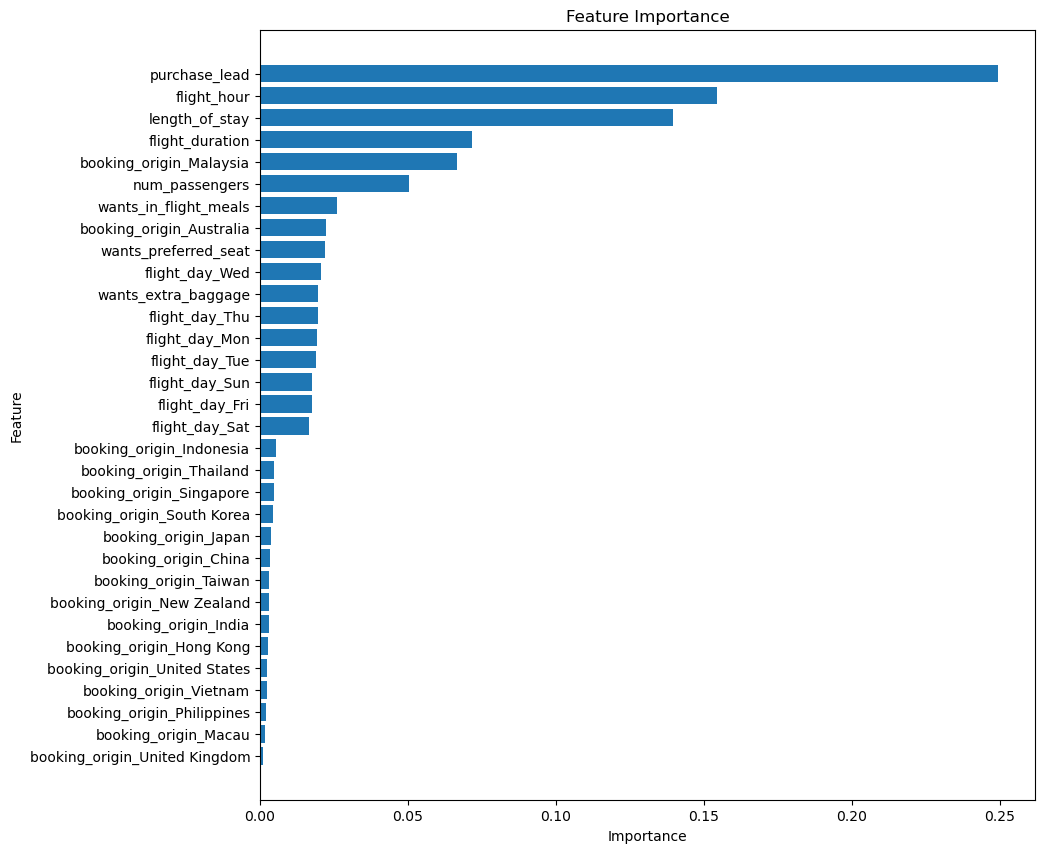

In [107]:
#Get feature importance
feature_importances = rf_regressor.feature_importances_

#Get feature names
feature_names = list(X1.columns)

#Sort feature importance and feature name in descending order
sorted_indices = np.argsort(feature_importances)
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

#Plot the feature importances
plt.figure(figsize=(10,10))
plt.barh(range(len(sorted_feature_importances)), sorted_feature_importances, tick_label=sorted_feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [108]:
df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,15,31,17,Mon,Malaysia,0,0,0,8.83,1
1,1,31,274,10,Tue,Malaysia,1,0,0,8.83,0
2,1,316,35,16,Tue,Malaysia,1,0,0,8.83,0
3,2,232,17,3,Tue,Malaysia,1,1,1,8.83,0
4,1,156,19,14,Mon,Malaysia,1,0,0,8.83,1
...,...,...,...,...,...,...,...,...,...,...,...
33279,2,27,6,9,Sat,Australia,1,0,1,5.62,0
33280,1,111,6,4,Sun,Australia,0,0,0,5.62,0
33281,1,24,6,22,Sat,Australia,0,0,1,5.62,0
33282,1,15,6,11,Mon,Australia,1,0,1,5.62,0


In [109]:
df.booking_origin.value_counts()

booking_origin
Australia         13104
Malaysia           5289
South Korea        3501
Japan              2401
Thailand           1570
Indonesia          1339
Taiwan             1280
China              1184
New Zealand         982
India               716
Singapore           685
United States       274
Macau               264
Vietnam             244
Hong Kong           208
United Kingdom      123
Philippines         120
Name: count, dtype: int64

In [118]:
df = df[(df['booking_origin']=='Australia') | (df['booking_origin']=='Malaysia')].reset_index()

## Random Forest Regression 3

In [129]:
model3 = pd.get_dummies(df, dtype=int)
model3.head()

,index,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,flight_day_Fri,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed,booking_origin_Australia,booking_origin_Malaysia
0,0,1,15,31,17,0,0,0,8.83,1,0,1,0,0,0,0,0,0,1
1,1,1,31,274,10,1,0,0,8.83,0,0,0,0,0,0,1,0,0,1
2,2,1,316,35,16,1,0,0,8.83,0,0,0,0,0,0,1,0,0,1
3,3,2,232,17,3,1,1,1,8.83,0,0,0,0,0,0,1,0,0,1
4,4,1,156,19,14,1,0,0,8.83,1,0,1,0,0,0,0,0,0,1


In [150]:
y2=model3['booking_complete']
X2=model3.drop(['booking_complete','index'], axis=1)
X2.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,flight_day_Fri,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed,booking_origin_Australia,booking_origin_Malaysia
0,1,15,31,17,0,0,0,8.83,0,1,0,0,0,0,0,0,1
1,1,31,274,10,1,0,0,8.83,0,0,0,0,0,1,0,0,1
2,1,316,35,16,1,0,0,8.83,0,0,0,0,0,1,0,0,1
3,2,232,17,3,1,1,1,8.83,0,0,0,0,0,1,0,0,1
4,1,156,19,14,1,0,0,8.83,0,1,0,0,0,0,0,0,1


In [146]:
#Split the data into training and testing units 80/20
#random state = 42 fixes each set so it doesn't change
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size = 0.2, random_state = 42)

In [153]:
#Initialise lists to store performance metrics
mse_list = []
r2_list = []
k = 5
#loop to train k Random Forest models
for i in range(k):
     #Initialise the Random Forest Regressor with a different random state
    rf_regressor = RandomForestRegressor(n_estimators = 200, random_state = i)

    #Train the model
    rf_regressor.fit(X2_train, y2_train)
    
    #Make predictions on the test set
    y2_pred = rf_regressor.predict(X2_test)

    #Evaluate the model
    mse = mean_squared_error(y2_test, y2_pred)
    r2 = r2_score(y2_test, y2_pred)

    #Append the metrics to the lists
    mse_list.append(mse)
    r2_list.append(r2)

    print(f'Model {i+1}:')
    print(f' Mean Squared Error: {mse}')
    print(f' R-squared: {r2}')

#Calculate the average performance across all k models
average_mse = np.mean(mse_list)
average_r2 = np.mean(r2_list)

print(f'Average MSE: {average_mse}')
print(f'Average R-squared: {average_r2}')

    

Model 1:
 Mean Squared Error: 0.09918337216106429
 R-squared: 0.17479545323776968
Model 2:
 Mean Squared Error: 0.09937652915344582
 R-squared: 0.17318838922210666
Model 3:
 Mean Squared Error: 0.09949481666972533
 R-squared: 0.17220423841000743
Model 4:
 Mean Squared Error: 0.099579758849023
 R-squared: 0.17149752042854483
Model 5:
 Mean Squared Error: 0.0997083072946425
 R-squared: 0.17042799879913118
Average MSE: 0.09946855682558017
Average R-squared: 0.17242272001951195


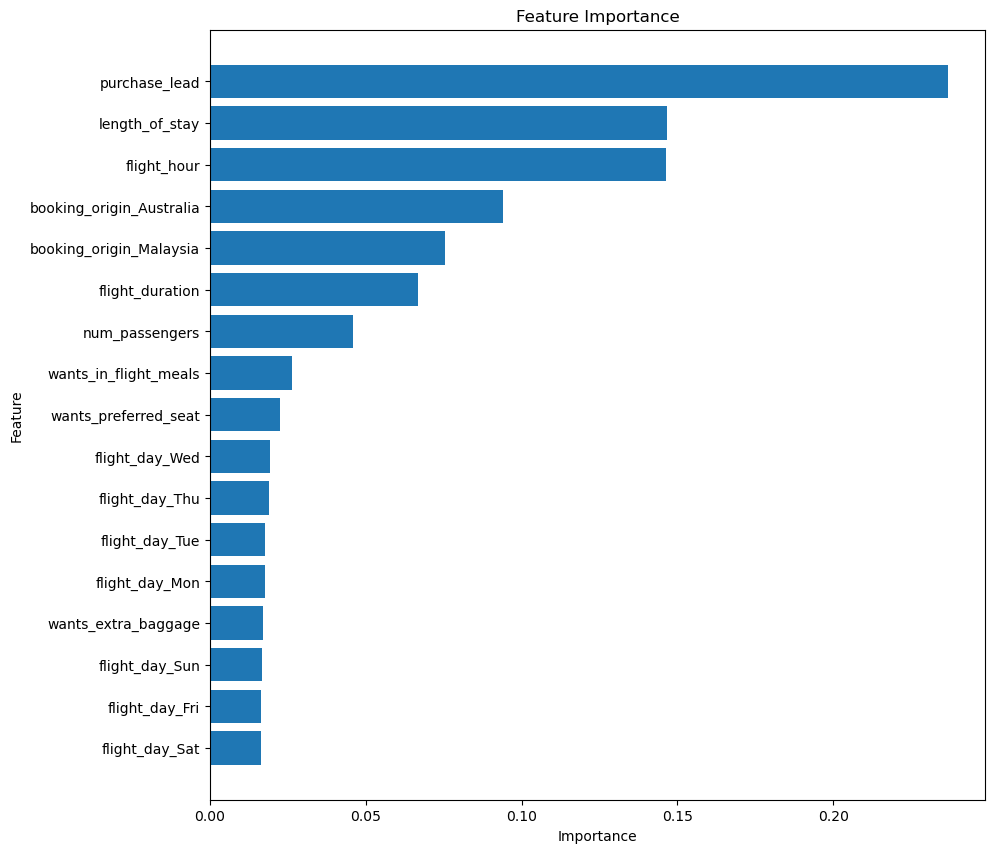

In [154]:
#Get feature importance
feature_importances = rf_regressor.feature_importances_

#Get feature names
feature_names = list(X2.columns)

#Sort feature importance and feature name in descending order
sorted_indices = np.argsort(feature_importances)
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

#Plot the feature importances
plt.figure(figsize=(10,10))
plt.barh(range(len(sorted_feature_importances)), sorted_feature_importances, tick_label=sorted_feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [149]:
#Initialise lists to store performance metrics
mse_list = []
r2_list = []
k = 5
#loop to train k Random Forest models
for i in range(k):
     #Initialise the Random Forest Regressor with a different random state
    rf_regressor = RandomForestRegressor(n_estimators = 500, random_state = i)

    #Train the model
    rf_regressor.fit(X2_train, y2_train)
    
    #Make predictions on the test set
    y2_pred = rf_regressor.predict(X2_test)

    #Evaluate the model
    mse = mean_squared_error(y2_test, y2_pred)
    r2 = r2_score(y2_test, y2_pred)

    #Append the metrics to the lists
    mse_list.append(mse)
    r2_list.append(r2)

    print(f'Model {i+1}:')
    print(f' Mean Squared Error: {mse}')
    print(f' R-squared: {r2}')

#Calculate the average performance across all k models
average_mse = np.mean(mse_list)
average_r2 = np.mean(r2_list)

print(f'Average MSE: {average_mse}')
print(f'Average R-squared: {average_r2}')

    

Model 1:
 Mean Squared Error: 0.09885368571924737
 R-squared: 0.17753844074530656
Model 2:
 Mean Squared Error: 0.09889059633689155
 R-squared: 0.17723134481944602
Model 3:
 Mean Squared Error: 0.09908496861596029
 R-squared: 0.1756141696321415
Model 4:
 Mean Squared Error: 0.09900353138661606
 R-squared: 0.1762917264692032
Model 5:
 Mean Squared Error: 0.09920724852552718
 R-squared: 0.17459680215255624
Average MSE: 0.09900800611684848
Average R-squared: 0.1762544967637307


No real improvement with 500 trees, so will leave final model at 200 trees.